# Cifar10

Let's move on from Cats & Dogs. We will try to create a CNN that will classify not 2 but 10 different image labels. We get the images from the dataset named [Cifar10](http://www.cs.utoronto.ca/~kriz/cifar.html) 

* Import :
  * Tensorflow
  * Numpy 
  * Matplotlib.pyplot 

In [ ]:
pip install tensorflow

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import tensorflow as tf
tf.__version__

'2.3.0'

* Using [`tf.keras.datasets`](https://www.tensorflow.org/api_docs/python/tf/keras/datasets) import cifar10 and store the data in `X_train, y_train, X_test, y_test`.

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10

(X_train, y_train),(X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


* View a random image of your dataset 

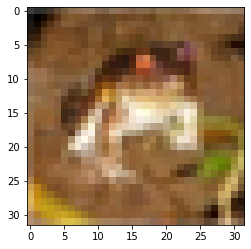

In [ ]:
plt.imshow(X_train[0])

* View a random image of each of your labels in your dataset 

In [ ]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [ ]:
def visualize_random_img_for_each_target(X ,y, nrows, ncols):
  
  fig, axes = plt.subplots(nrows=nrows, ncols=ncols, sharex=True, sharey=True)
  
  random_image = np.random.randint(100)
  
  index = nrows + ncols
  for row in range(nrows):
    for col in range(ncols):
      mask = y == nrows + ncols - index # == 0
      mask = mask.squeeze() # l'array viene rappresentato solo dalle linee 
      axes[row, col].imshow(X[mask][random_image])
      index -=1 


  print("index for each image :{}".format(np.unique(y)))

index for each image :[0 1 2 3 4 5 6 7 8 9]


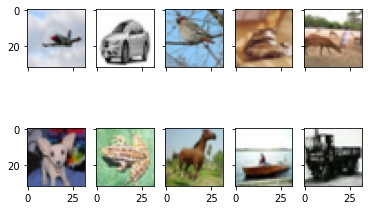

In [ ]:
  visualize_random_img_for_each_target(X_train,y_train, 2, 5)

* Store your training images and labels in a `tf.data.Dataset`.
* Do the same with images and validation labels

In [ ]:
ds_train = tf.data.Dataset.from_tensor_slices((X_train, y_train))
ds_valid = tf.data.Dataset.from_tensor_slices((X_test, y_test))

ds_train

<TensorSliceDataset shapes: ((32, 32, 3), (1,)), types: (tf.uint8, tf.uint8)>

* Shuffle your dataset via `.shuffle()` and create 16-frame batches via `.batch()`.

In [ ]:
ds_train = ds_train.shuffle(50000).batch(16)
ds_valid = ds_valid.batch(16)

In [ ]:
ds_train

<BatchDataset shapes: ((None, 32, 32, 3), (None, 1)), types: (tf.uint8, tf.uint8)>

* Look at an example 

In [ ]:
for image in ds_train.take(1):
  print(image)

(<tf.Tensor: shape=(16, 32, 32, 3), dtype=uint8, numpy=
array([[[[244, 247, 252],
         [244, 247, 252],
         [244, 247, 252],
         ...,
         [228, 238, 248],
         [227, 237, 247],
         [228, 237, 248]],

        [[244, 247, 252],
         [244, 247, 252],
         [244, 247, 252],
         ...,
         [228, 237, 247],
         [230, 239, 249],
         [235, 243, 253]],

        [[244, 247, 252],
         [244, 247, 252],
         [244, 247, 252],
         ...,
         [233, 242, 251],
         [232, 241, 250],
         [214, 223, 231]],

        ...,

        [[184, 189, 192],
         [181, 186, 190],
         [178, 183, 179],
         ...,
         [215, 217, 216],
         [215, 217, 215],
         [213, 214, 211]],

        [[182, 187, 191],
         [181, 187, 189],
         [181, 184, 188],
         ...,
         [212, 214, 213],
         [215, 216, 214],
         [214, 214, 212]],

        [[184, 189, 193],
         [185, 189, 194],
         [171, 176

* Create a CNN model in which you will put 2D convolutional layers and MaxPool2D layers 

In [ ]:
# Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'),
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'),
    tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dropout(0.05),
    tf.keras.layers.Dense(units=32, activation ="relu"),
    tf.keras.layers.Dense(units=16, activation ="relu"),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

* Create a _Learning Rate Schedule_. You can choose to do this with [_ExponentialDecay_](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/schedules/ExponentialDecay) or [other methods](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/schedules)

In [ ]:
# Create a schedule learning rate
initial_learning_rate = 0.0005

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=6000, #the lr is lowered every decay_steps/n_batches epochs
    decay_rate=0.96,
    staircase=True)

* Create a compiler in which you choose : 
  * Your optimizer 
  * Your loss 
  * Your metrics 

In [ ]:
# Create a compiler
model.compile(optimizer = tf.keras.optimizers.Adam(lr_schedule),
              loss= tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics = [tf.keras.metrics.SparseCategoricalAccuracy()])

* Run your model on 10 epochs 

In [ ]:
model.fit(ds_train, epochs=10)

Epoch 1/10
3125/3125 [==============================] - 9s 3ms/step - loss: 1.7712 - sparse_categorical_accuracy: 0.3547
Epoch 2/10
3125/3125 [==============================] - 9s 3ms/step - loss: 1.3173 - sparse_categorical_accuracy: 0.5258
Epoch 3/10
3125/3125 [==============================] - 9s 3ms/step - loss: 1.1457 - sparse_categorical_accuracy: 0.5941
Epoch 4/10
3125/3125 [==============================] - 9s 3ms/step - loss: 1.0289 - sparse_categorical_accuracy: 0.6377
Epoch 5/10
3125/3125 [==============================] - 9s 3ms/step - loss: 0.9434 - sparse_categorical_accuracy: 0.6676
Epoch 6/10
3125/3125 [==============================] - 10s 3ms/step - loss: 0.8809 - sparse_categorical_accuracy: 0.6917
Epoch 7/10
3125/3125 [==============================] - 9s 3ms/step - loss: 0.8194 - sparse_categorical_accuracy: 0.7151
Epoch 8/10
3125/3125 [==============================] - 9s 3ms/step - loss: 0.7707 - sparse_categorical_accuracy: 0.7304
Epoch 9/10
3125/3125 [=========

* Evaluate your model

In [ ]:
model.evaluate(ds_valid)

625/625 [==============================] - 1s 2ms/step - loss: 1.0362 - sparse_categorical_accuracy: 0.6580


[1.036247968673706, 0.6579999923706055]

* Try to train your model again. This time though: 
  * Add the argument *validation_data = ds_valid*  
  * Take this opportunity to record your training in a variable _history_
  
* What can you conclude about your model?

In [ ]:
history = model.fit(ds_train, validation_data = ds_valid, epochs=10)

Epoch 1/10
3125/3125 [==============================] - 10s 3ms/step - loss: 0.6662 - sparse_categorical_accuracy: 0.7678 - val_loss: 0.9713 - val_sparse_categorical_accuracy: 0.6919
Epoch 2/10
3125/3125 [==============================] - 10s 3ms/step - loss: 0.6348 - sparse_categorical_accuracy: 0.7798 - val_loss: 0.9518 - val_sparse_categorical_accuracy: 0.6966
Epoch 3/10
3125/3125 [==============================] - 10s 3ms/step - loss: 0.6060 - sparse_categorical_accuracy: 0.7879 - val_loss: 0.9371 - val_sparse_categorical_accuracy: 0.7059
Epoch 4/10
3125/3125 [==============================] - 10s 3ms/step - loss: 0.5788 - sparse_categorical_accuracy: 0.7998 - val_loss: 0.9353 - val_sparse_categorical_accuracy: 0.7054
Epoch 5/10
3125/3125 [==============================] - 10s 3ms/step - loss: 0.5628 - sparse_categorical_accuracy: 0.8031 - val_loss: 0.9558 - val_sparse_categorical_accuracy: 0.7004
Epoch 6/10
3125/3125 [==============================] - 10s 3ms/step - loss: 0.5322 -

* Look what's in `history.history`

In [ ]:
history.history

{'loss': [0.6662099957466125,
  0.634759247303009,
  0.605994701385498,
  0.578781008720398,
  0.5627963542938232,
  0.5321890115737915,
  0.514293372631073,
  0.49055033922195435,
  0.4733584523200989,
  0.4519946873188019],
 'sparse_categorical_accuracy': [0.7678200006484985,
  0.7797999978065491,
  0.787880003452301,
  0.799780011177063,
  0.8031200170516968,
  0.8135799765586853,
  0.8216000199317932,
  0.8296200037002563,
  0.8331800103187561,
  0.84197998046875],
 'val_loss': [0.971294641494751,
  0.9518433809280396,
  0.9371368288993835,
  0.935322642326355,
  0.9557570219039917,
  0.9985307455062866,
  1.0241286754608154,
  0.9981381893157959,
  1.024714708328247,
  1.0508841276168823],
 'val_sparse_categorical_accuracy': [0.6919000148773193,
  0.6966000199317932,
  0.7059000134468079,
  0.7053999900817871,
  0.7003999948501587,
  0.6923999786376953,
  0.6887000203132629,
  0.6998999714851379,
  0.7078999876976013,
  0.7016000151634216]}

* Now watch a graph of how your *loss* evolves as epochs advance 

Text(0, 0.5, 'Train_Loss and Validation Loss')

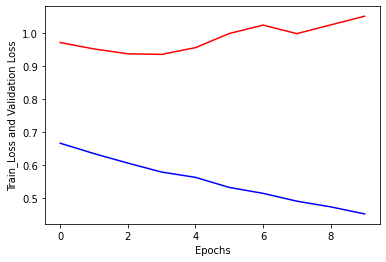

In [ ]:
plt.plot(history.history['val_loss'], 'r')
plt.plot(history.history['loss'], 'b')
plt.xlabel('Epochs')
plt.ylabel('Train_Loss and Validation Loss')


* Do the same with your Accuracy 

Text(0, 0.5, 'Train_Loss and Validation Loss')

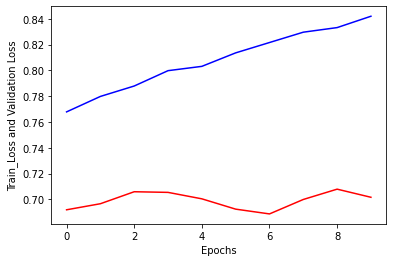

In [ ]:
plt.plot(history.history['val_sparse_categorical_accuracy'], 'r')
plt.plot(history.history['sparse_categorical_accuracy'], 'b')
plt.xlabel('Epochs')
plt.ylabel('Train_Loss and Validation Loss')

* One way to deal with overfitting is to do what's called _Data Augmenting_. The principle is to take the images we have in the dataset and repeat them with some minor changes like : 
  * Changing the color, the brightness 
  * Flip the image
  * Crop image 

This technique makes it possible to create new images on which the model can train and therefore perform better! Let's try to see what this could look like on our dataset. 

* Start by using the [`.unbatch()`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#unbatch) function on your training and validation dataset. We'll change the size of the batches later. 

In [ ]:
ds_train = tf.data.Dataset.from_tensor_slices((X_train, y_train))
ds_valid = tf.data.Dataset.from_tensor_slices((X_test, y_test))
ds_train = ds_train.shuffle(50000).batch(16)
ds_valid = ds_valid.shuffle(50000).batch(16)

ds_train = ds_train.unbatch()
ds_valid = ds_valid.unbatch()

In [ ]:
for example in ds_train.take(1):
  print(example)

(<tf.Tensor: shape=(32, 32, 3), dtype=uint8, numpy=
array([[[ 95,  57,  21],
        [ 98,  58,  21],
        [101,  59,  20],
        ...,
        [ 46,  34,  26],
        [ 49,  35,  26],
        [ 56,  39,  29]],

       [[ 91,  55,  20],
        [ 94,  56,  20],
        [ 97,  57,  19],
        ...,
        [ 53,  44,  39],
        [ 46,  33,  25],
        [ 53,  35,  22]],

       [[ 86,  52,  18],
        [ 89,  53,  18],
        [ 93,  55,  18],
        ...,
        [ 53,  41,  35],
        [ 49,  34,  24],
        [ 57,  40,  24]],

       ...,

       [[233, 231, 231],
        [242, 242, 242],
        [226, 228, 230],
        ...,
        [ 41,  37,  27],
        [ 37,  37,  29],
        [ 44,  38,  30]],

       [[179, 178, 181],
        [203, 205, 209],
        [183, 187, 192],
        ...,
        [ 40,  35,  23],
        [ 37,  37,  31],
        [ 41,  37,  35]],

       [[133, 131, 126],
        [105, 104, 102],
        [ 63,  64,  63],
        ...,
        [ 46,  35,  25

* Check that you have size tensors $(32, 32, 3)$ by looking at an example in your dataset 

* Using the [`repeat()`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#repeat) function, copy your dataset 10 times. 

In [ ]:
repeated_ds = ds_train.repeat(10)

* We will now proceed to a phase of data augmentation. Create a `data_aug(image, label)` function which takes an image and a label as arguments. Within this function, try using :
  * tf.image.random_flip_left_right
  * tf.image.random_contrast
  * tf.image.random_crop
  * Divide the tensor by 255

  * You can try other things if you want to *

In [ ]:
def data_aug(image, label):
  image = tf.image.random_flip_left_right(image)
  image = tf.image.random_contrast(image, 0.2, 0.5)
  image = tf.image.random_crop(image, size = [24, 24, 3])
  image = tf.image.resize(image, [32,32])
  image = image/255.0

  return image, label


* Use the `.map()` function to apply your function on your tf dataset

In [ ]:
repeated_ds = repeated_ds.map(data_aug)

* Create a function for your validation dataset where you simply divide the tensors by 255. We don't want to apply a data augmentation to our validation dataset. 

In [ ]:
def valid_aug(image, label):
  image= image/ 255       #tf.cast(image, tf.float32)
  return image, label

* Apply the function to your validation dataset 

In [ ]:
ds_valid = ds_valid.map(valid_aug)

* Create batches of 32 images for your validation and training dataset 

In [ ]:
repeated_ds = repeated_ds.shuffle(len(X_train)*10).batch(32)
ds_valid = ds_valid.batch(32)

* Reapply the same model on your new dataset
  * Don't forget to store your training in a `history` variable.

In [ ]:
history = model.fit(repeated_ds, validation_data=ds_valid, epochs = 15)

15625/15625 [==============================] - 60s 4ms/step - loss: 1.8298 - sparse_categorical_accuracy: 0.3104 - val_loss: 1.9372 - val_sparse_categorical_accuracy: 0.3639
Epoch 2/15
15625/15625 [==============================] - 60s 4ms/step - loss: 1.5063 - sparse_categorical_accuracy: 0.4468 - val_loss: 1.8528 - val_sparse_categorical_accuracy: 0.4258
Epoch 3/15
15625/15625 [==============================] - 62s 4ms/step - loss: 1.3499 - sparse_categorical_accuracy: 0.5124 - val_loss: 1.6733 - val_sparse_categorical_accuracy: 0.5047
Epoch 4/15
15625/15625 [==============================] - 62s 4ms/step - loss: 1.2433 - sparse_categorical_accuracy: 0.5553 - val_loss: 1.5592 - val_sparse_categorical_accuracy: 0.5430
Epoch 5/15
15625/15625 [==============================] - 62s 4ms/step - loss: 1.1712 - sparse_categorical_accuracy: 0.5822 - val_loss: 1.7828 - val_sparse_categorical_accuracy: 0.5276
Epoch 6/15
15625/15625 [==============================] - 62s 4ms/step - loss: 1.1171 

Text(0, 0.5, 'Train_Loss and Validation Loss')

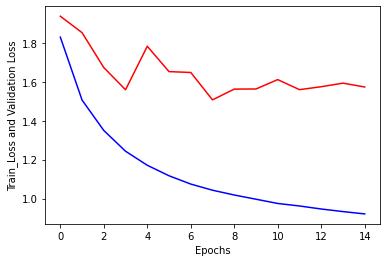

In [ ]:
plt.plot(history.history['val_loss'], 'r')
plt.plot(history.history['loss'], 'b')
plt.xlabel('Epochs')
plt.ylabel('Train_Loss and Validation Loss')

Text(0, 0.5, 'Train_Loss and Validation Loss')

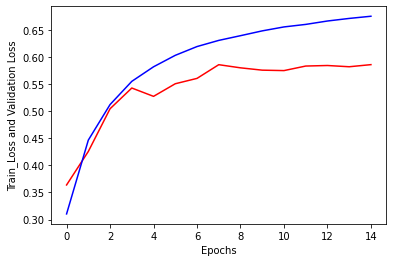

In [ ]:
plt.plot(history.history['val_sparse_categorical_accuracy'], 'r')
plt.plot(history.history['sparse_categorical_accuracy'], 'b')
plt.xlabel('Epochs')
plt.ylabel('Train_Loss and Validation Loss')

* Let's try a new technique of regulation: the Dropout. Add a few layers of 20% dropout in your model. 

In [ ]:
# Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dropout(0.05),
    tf.keras.layers.Dense(units=32, activation ="relu"),
    tf.keras.layers.Dense(units=16, activation ="relu"),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

In [ ]:

# Learning Rate Schedule 
initial_learning_rate = 0.0005

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=10000,
    decay_rate=0.95,
    staircase=True)

# Compileur
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = lr_schedule),
              loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics = [tf.keras.metrics.SparseCategoricalAccuracy()])

* Re-train your model on 15 to 30 epochs * Re-train your model on 15 to 30 epochs 

In [ ]:
history = model.fit(repeated_ds, validation_data=ds_valid, epochs = 15)

Epoch 1/15
15625/15625 [==============================] - 54s 3ms/step - loss: 1.7538 - sparse_categorical_accuracy: 0.3514 - val_loss: 1.7058 - val_sparse_categorical_accuracy: 0.4449
Epoch 2/15
15625/15625 [==============================] - 54s 3ms/step - loss: 1.4779 - sparse_categorical_accuracy: 0.4641 - val_loss: 1.7184 - val_sparse_categorical_accuracy: 0.4760
Epoch 3/15
15625/15625 [==============================] - 54s 3ms/step - loss: 1.3811 - sparse_categorical_accuracy: 0.5036 - val_loss: 1.5872 - val_sparse_categorical_accuracy: 0.5138
Epoch 4/15
15625/15625 [==============================] - 55s 3ms/step - loss: 1.3242 - sparse_categorical_accuracy: 0.5257 - val_loss: 1.5855 - val_sparse_categorical_accuracy: 0.5175
Epoch 5/15
15625/15625 [==============================] - 53s 3ms/step - loss: 1.2859 - sparse_categorical_accuracy: 0.5394 - val_loss: 1.5298 - val_sparse_categorical_accuracy: 0.5387
Epoch 6/15
15625/15625 [==============================] - 54s 3ms/step - lo

* Make the visualizations of loss and accuracy 

Text(0, 0.5, 'Train_Loss and Validation Loss')

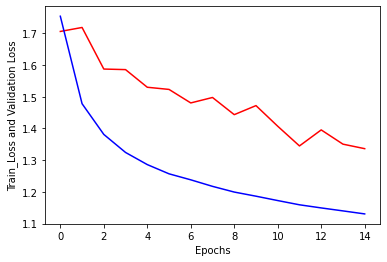

In [ ]:
plt.plot(history.history['val_loss'], 'r')
plt.plot(history.history['loss'], 'b')
plt.xlabel('Epochs')
plt.ylabel('Train_Loss and Validation Loss')

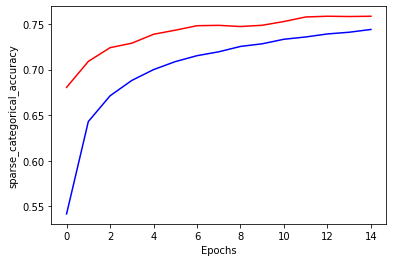

In [ ]:
plt.plot(history.history['val_sparse_categorical_accuracy'], 'r')
plt.plot(history.history['sparse_categorical_accuracy'], 'b')
plt.xlabel('Epochs')
plt.ylabel('Train_Loss and Validation Loss')

---> Not bad, we're getting some decent scores! 